In [7]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset

from sklearn.naive_bayes import MultinomialNB, GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV




In [2]:
df = pd.read_csv("df_manjiSW1.csv")


In [ ]:
#df.columns

Index(['Unnamed: 0', 'majority_target', 'statement', 'BinaryNumTarget',
       'tweet', 'followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'listed_count', 'BotScore', 'BotScoreBinary', 'cred',
       'normalize_influence', 'mentions', 'quotes', 'replies', 'retweets',
       'favourites', 'hashtags', 'URLs', 'tweet_new', 'tweet_tokens',
       'Word count', 'Max word length', 'Min word length',
       'Average word length', 'Present verbs', 'Past verbs', 'Adjectives',
       'Adverbs', 'Pronouns', 'Conjunctions', 'Determiners', 'Prepositions',
       'Digits'],
      dtype='object')

# Classification User

In [139]:
feature_cols_users = ['followers_count', 'favourites_count','friends_count',
       'statuses_count', 'listed_count', 'cred','BotScore',
       'normalize_influence']

In [35]:
zalogskal = ['followers_count', 'favourites_count','friends_count',
       'statuses_count', 'listed_count', 'mentions', 'quotes']

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df[feature_cols_users]
y = df['BinaryNumTarget']

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)  
X_new = rfe.fit_transform(X, y)

selected_features = [f for f, s in zip(feature_cols_users, rfe.support_) if s]
print("Selected features:", selected_features)


Selected features: ['statuses_count', 'listed_count', 'cred', 'BotScore', 'normalize_influence']


In [20]:
fu = ['followers_count', 'listed_count', 'BotScoreBinary', 'mentions', 'quotes']

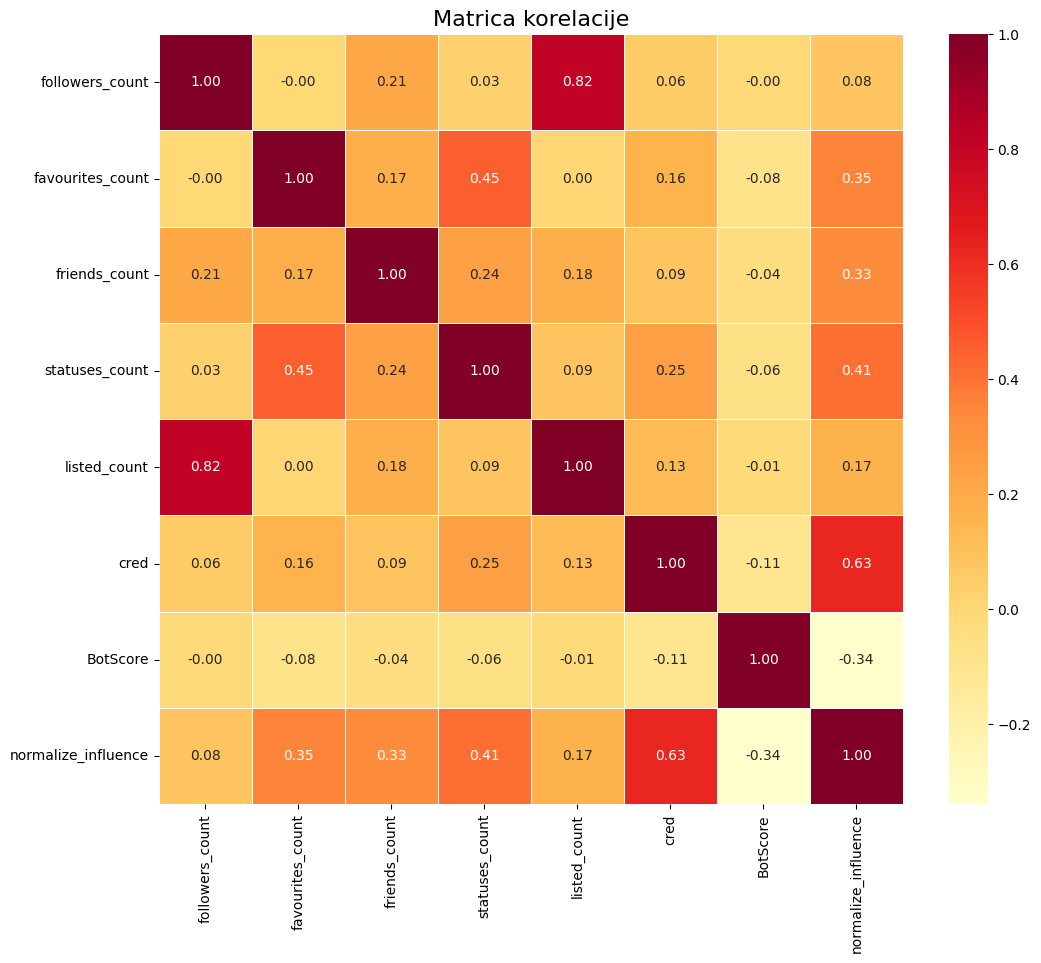

In [21]:
correlation_matrix = df[feature_cols_users].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Matrica korelacije', fontsize=16)
plt.show()

In [22]:
for col in zalogskal:
    df[f'{col}'] = np.log1p(df[col])

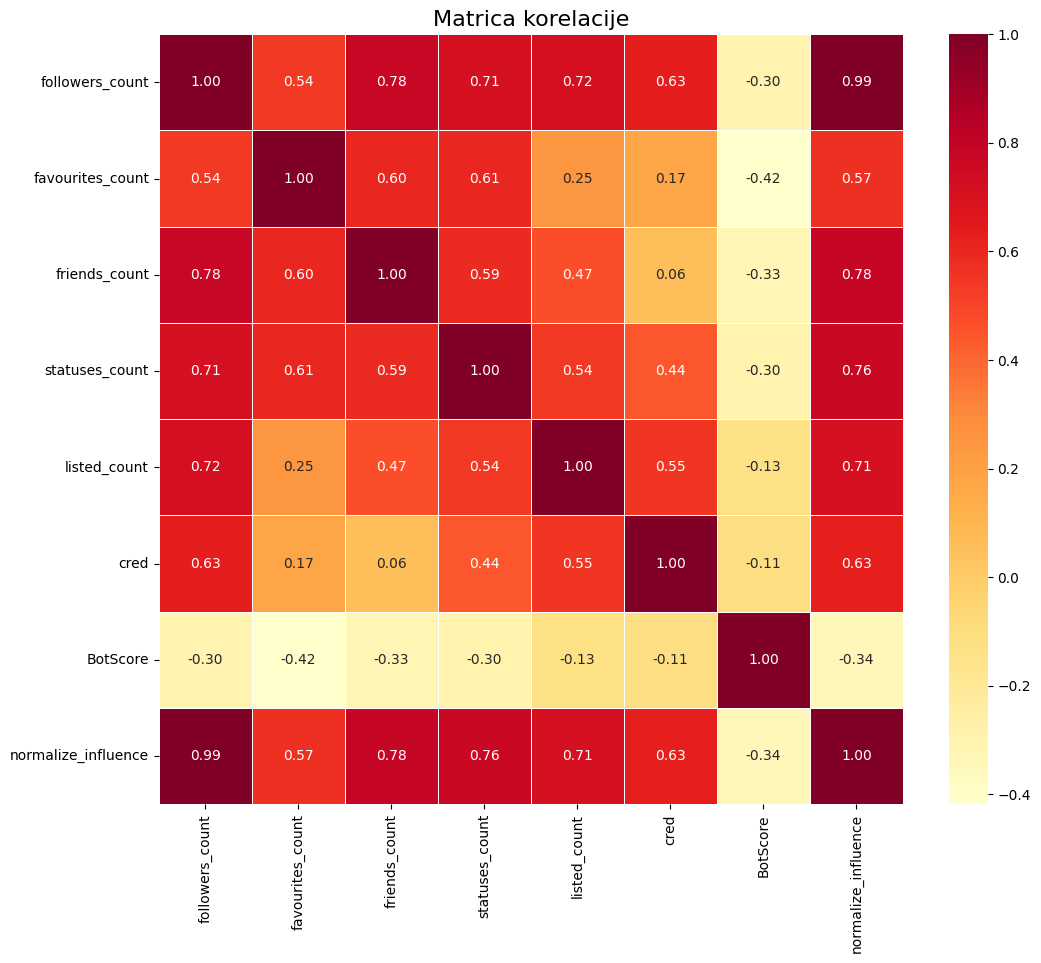

In [23]:
correlation_matrix = df[feature_cols_users].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Matrica korelacije', fontsize=16)
plt.show()

Explained Variance Ratio per component: [6.73989333e-01 1.78309816e-01 6.76294902e-02 5.05509001e-02
 2.82159223e-02 1.00656779e-03 2.97879063e-04 9.11000423e-08]
Cumulative Explained Variance: [0.67398933 0.85229915 0.91992864 0.97047954 0.99869546 0.99970203
 0.99999991 1.        ]


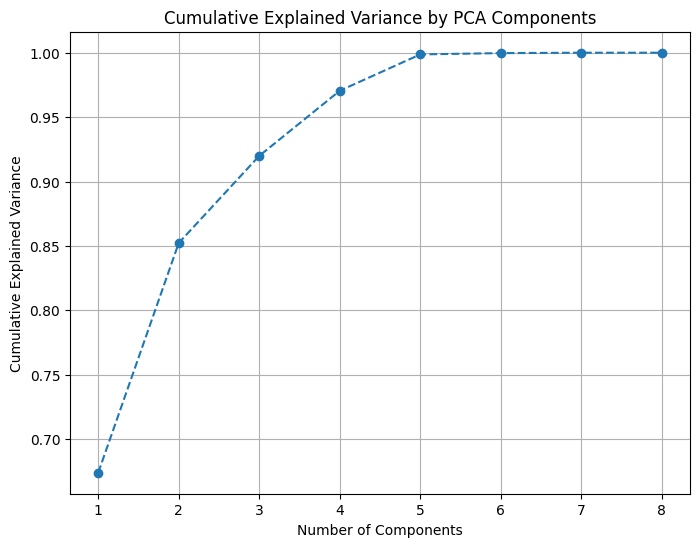

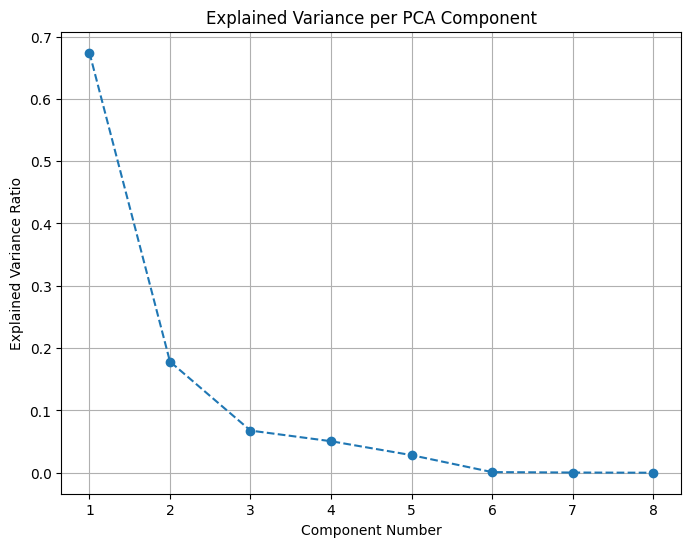

In [24]:


x = df[feature_cols_users]

pca = PCA()
pca.fit(x)


print("Explained Variance Ratio per component:", pca.explained_variance_ratio_)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance per PCA Component')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()


In [25]:
pca = PCA(n_components=4)  
x_pca = pca.fit_transform(x)

In [101]:
# Priprema podataka
x = df[feature_cols_users]
y = df['BinaryNumTarget']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [27]:
df.shape

(134198, 36)

In [ ]:
#Random Forest - User

rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.661736214605067
Precision: 0.6728605647092981
Recall: 0.6697009102730819
F1: 0.671277019443137
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65     12998
         1.0       0.67      0.67      0.67     13842

    accuracy                           0.66     26840
   macro avg       0.66      0.66      0.66     26840
weighted avg       0.66      0.66      0.66     26840

------------------------------
Confusion matrix:
[[8491 4507]
 [4572 9270]]


In [ ]:

#Decision Tree - User

clf = DecisionTreeClassifier()


param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6319672131147541
Precision: 0.6424259844782984
Recall: 0.6458604247941049
F1: 0.644138626702212
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62     12998
         1.0       0.64      0.65      0.64     13842

    accuracy                           0.63     26840
   macro avg       0.63      0.63      0.63     26840
weighted avg       0.63      0.63      0.63     26840

------------------------------
Confusion matrix:
[[8022 4976]
 [4902 8940]]


In [30]:
# Naive Bayes - User

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.5582339791356185
Precision: 0.5808685732909639
Recall: 0.5150267302412946
F1: 0.5459697491862914
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.60      0.57     12998
         1.0       0.58      0.52      0.55     13842

    accuracy                           0.56     26840
   macro avg       0.56      0.56      0.56     26840
weighted avg       0.56      0.56      0.56     26840

------------------------------
Confusion matrix:
[[7854 5144]
 [6713 7129]]


In [ ]:
# Logistic Regression - User

param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='f1')
grid_search.fit(x_train, y_train)

print("Best hyperparameters from GridSearchCV:", grid_search.best_params_)

lr = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear', C=grid_search.best_params_['C'])

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Best hyperparameters from GridSearchCV: {'C': 100}
Accuracy: 0.5645678092399404
Precision: 0.5981061640717472
Recall: 0.4745701488224245
F1: 0.5292245720040282
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.66      0.59     12998
         1.0       0.60      0.47      0.53     13842

    accuracy                           0.56     26840
   macro avg       0.57      0.57      0.56     26840
weighted avg       0.57      0.56      0.56     26840

------------------------------
Confusion matrix:
[[8584 4414]
 [7273 6569]]


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#KNeighbors - User


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.6540983606557377
Precision: 0.6643351600807614
Recall: 0.6655830082358041
F1: 0.664958498736918
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64     12998
         1.0       0.66      0.67      0.66     13842

    accuracy                           0.65     26840
   macro avg       0.65      0.65      0.65     26840
weighted avg       0.65      0.65      0.65     26840

------------------------------
Confusion matrix:
[[8343 4655]
 [4629 9213]]


In [ ]:
#XGBoost - User

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    #'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.628204172876304
Precision: 0.6468932998707126
Recall: 0.6145065741944805
F1: 0.6302841687970064
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.63     12998
         1.0       0.65      0.61      0.63     13842

    accuracy                           0.63     26840
   macro avg       0.63      0.63      0.63     26840
weighted avg       0.63      0.63      0.63     26840

------------------------------
Confusion matrix:
[[8355 4643]
 [5336 8506]]


In [ ]:
#SVM - User

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.575
Precision: 0.6180777810105712
Recall: 0.46041034532582
F1: 0.5277191239183538
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.70      0.61     12998
         1.0       0.62      0.46      0.53     13842

    accuracy                           0.57     26840
   macro avg       0.58      0.58      0.57     26840
weighted avg       0.58      0.57      0.57     26840

------------------------------
Confusion matrix:
[[9060 3938]
 [7469 6373]]


# Classification - Tweet Feature

In [138]:
feature_cols_tweet = [
        'Word count',
       'Max word length', 'Min word length', 'Average word length',
       'Present verbs', 'Past verbs', 'Adjectives', 'Adverbs', 'Pronouns',
       'Conjunctions', 'Determiners', 'Prepositions', 'Digits'
]

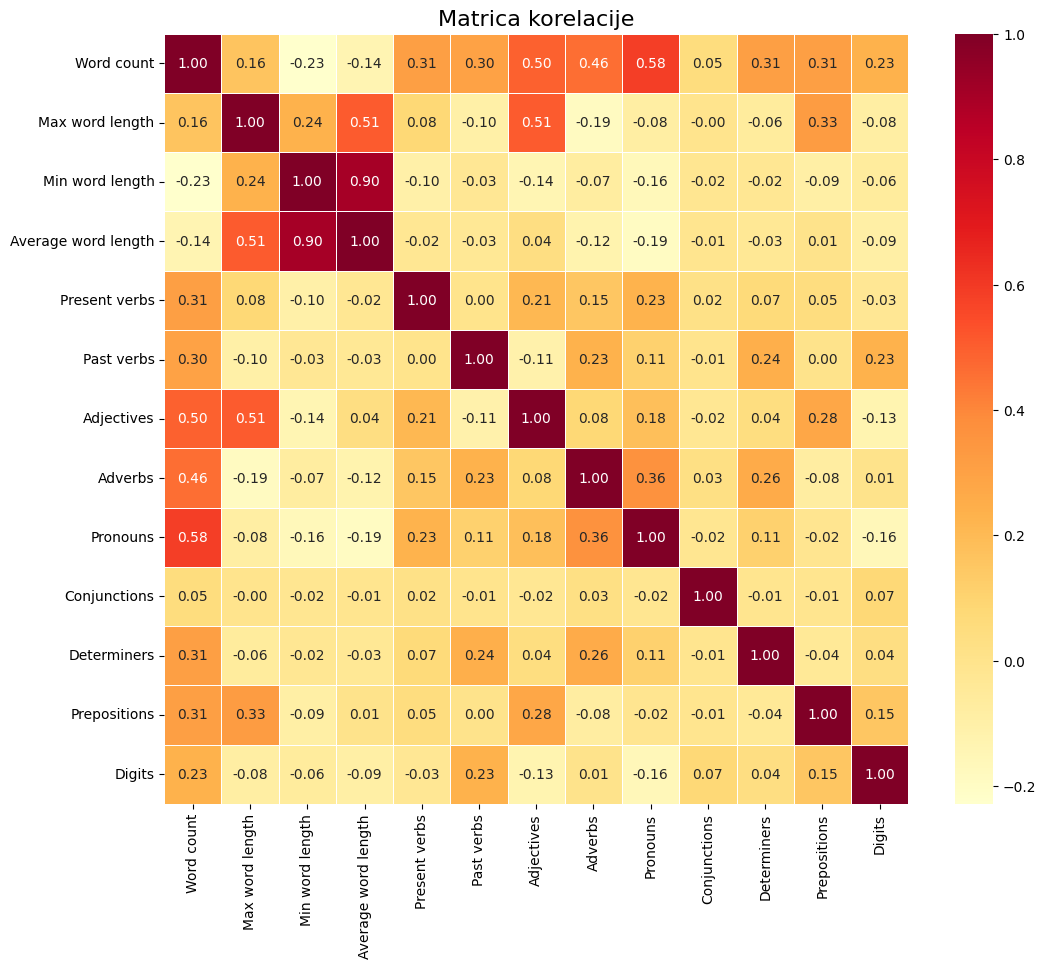

In [ ]:
correlation_matrix = df[feature_cols_tweet].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Matrica korelacije', fontsize=16)
plt.show()

In [ ]:
#for col in feature_cols_tweet:
 #   df[f'{col}'] = np.log1p(df[col])

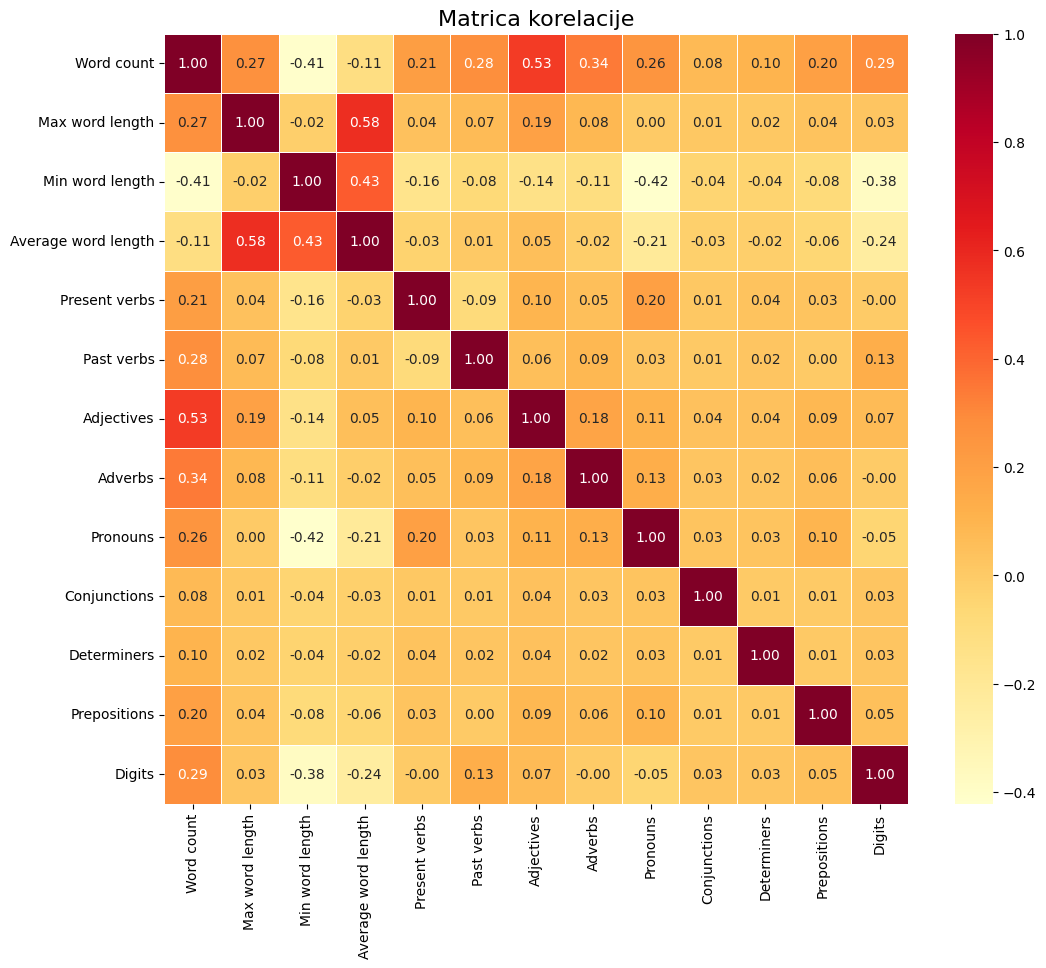

In [ ]:
correlation_matrix = df[feature_cols_tweet].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Matrica korelacije', fontsize=16)
plt.show()

In [130]:
x = df[feature_cols_tweet]
y = df['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [ ]:

model = RandomForestClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_


In [ ]:

feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                Feature  Importance
3   Average word length    0.224707
0            Word count    0.158821
1       Max word length    0.110380
6            Adjectives    0.081177
8              Pronouns    0.078414
7               Adverbs    0.073670
4         Present verbs    0.048451
5            Past verbs    0.048305
11         Prepositions    0.047769
12               Digits    0.043898
2       Min word length    0.040869
10          Determiners    0.035847
9          Conjunctions    0.007691


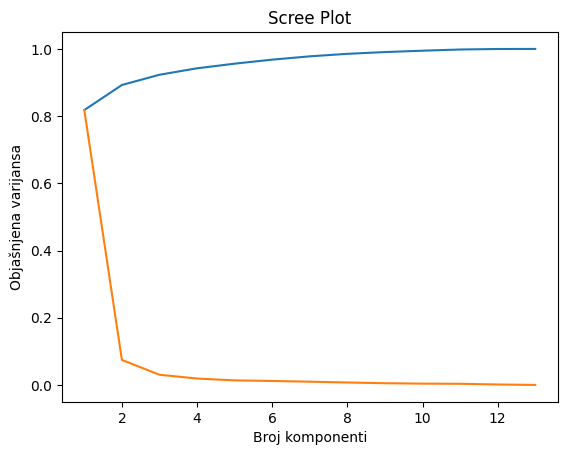

Broj komponenti za 95% varijanse: 5


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA()
pca.fit(x_train)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()


plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Broj komponenti')
plt.ylabel('Kumulativni procenat varijanse')
plt.title('PCA - Kumulativna varijansa')
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Broj komponenti')
plt.ylabel('Objašnjena varijansa')
plt.title('Scree Plot')
plt.show()

plt.show()

# Pronađi broj komponenti koje objašnjavaju 95% varijanse
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"Broj komponenti za 95% varijanse: {n_components_95}")


In [ ]:
'''from sklearn.decomposition import PCA

pca = PCA(n_components=5)
x_pca = pca.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=1) 


print(f"Procenat objašnjene varijanse sa 5 komponenti: {sum(pca.explained_variance_ratio_):.4f}")'''


Procenat objašnjene varijanse sa 5 komponenti: 0.9562


In [ ]:
'''from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline


k = 5
selector = SelectKBest(score_func=f_classif, k=k)


x_train_selected = selector.fit_transform(x_train, y_train)

x_test_selected = selector.transform(x_test)

selected_features_mask = selector.get_support()
selected_feature_names = [col for col, selected in zip(x_train.columns, selected_features_mask) if selected]

print("Odabrani atributi:", selected_feature_names)'''


Odabrani atributi: ['Word count', 'Past verbs', 'Pronouns', 'Determiners', 'Digits']


In [ ]:
# Random Forest - Tweet


rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


KeyboardInterrupt: 

In [128]:
# Decision Tree - Tweet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.618070044709389
Precision: 0.6474016911583614
Recall: 0.5697153590521601
F1: 0.6060792375975099
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.67      0.63     12998
         1.0       0.65      0.57      0.61     13842

    accuracy                           0.62     26840
   macro avg       0.62      0.62      0.62     26840
weighted avg       0.62      0.62      0.62     26840

------------------------------
Confusion matrix:
[[8703 4295]
 [5956 7886]]


In [108]:
# Decision Tree - Tweet


clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.619709388971684
Precision: 0.6483068135454917
Recall: 0.5739777488802196
F1: 0.608882247001571
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.67      0.63     12998
         1.0       0.65      0.57      0.61     13842

    accuracy                           0.62     26840
   macro avg       0.62      0.62      0.62     26840
weighted avg       0.62      0.62      0.62     26840

------------------------------
Confusion matrix:
[[8688 4310]
 [5897 7945]]


In [119]:
len(df[df['BinaryNumTarget']==0.0])

65268

In [120]:
len(df[df['BinaryNumTarget']==1.0])

68930

In [109]:
# Naive Bayes -  Tweet

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 5.0, 'fit_prior': True}
Accuracy: 0.597913561847988
Precision: 0.6036005434782609
Recall: 0.6418870105476088
F1: 0.6221553112527134
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.55      0.57     12998
         1.0       0.60      0.64      0.62     13842

    accuracy                           0.60     26840
   macro avg       0.60      0.60      0.60     26840
weighted avg       0.60      0.60      0.60     26840

------------------------------
Confusion matrix:
[[7163 5835]
 [4957 8885]]


In [ ]:
# Logistic Regression - Tweet

lr = LogisticRegression(max_iter=1000)  
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.5975409836065574
Precision: 0.600144946633285
Recall: 0.6580696431151568
F1: 0.6277739490006892
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.53      0.56     12998
         1.0       0.60      0.66      0.63     13842

    accuracy                           0.60     26840
   macro avg       0.60      0.60      0.59     26840
weighted avg       0.60      0.60      0.60     26840

------------------------------
Confusion matrix:
[[6929 6069]
 [4733 9109]]


In [ ]:
#KNeighbors - Tweet


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.6301788375558868
Precision: 0.6474397590361446
Recall: 0.6211530125704378
F1: 0.6340240395251088
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.63     12998
         1.0       0.65      0.62      0.63     13842

    accuracy                           0.63     26840
   macro avg       0.63      0.63      0.63     26840
weighted avg       0.63      0.63      0.63     26840

------------------------------
Confusion matrix:
[[8316 4682]
 [5244 8598]]


In [ ]:
#XGBoost - Tweet

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    #'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.6475782414307004
Precision: 0.6632888756426496
Recall: 0.643115156769253
F1: 0.6530462531636284
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64     12998
         1.0       0.66      0.64      0.65     13842

    accuracy                           0.65     26840
   macro avg       0.65      0.65      0.65     26840
weighted avg       0.65      0.65      0.65     26840

------------------------------
Confusion matrix:
[[8479 4519]
 [4940 8902]]


In [ ]:
# SVM - Tweet

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.6057004470938897
Precision: 0.6177809902421395
Recall: 0.617468573905505
F1: 0.6176247425660295
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59     12998
         1.0       0.62      0.62      0.62     13842

    accuracy                           0.61     26840
   macro avg       0.61      0.61      0.61     26840
weighted avg       0.61      0.61      0.61     26840

------------------------------
Confusion matrix:
[[7710 5288]
 [5295 8547]]


In [ ]:
random_predictions = np.random.randint(0, 2, size=len(y_test)) 


print("=== Random Baseline Model ===")
print("Accuracy:", metrics.accuracy_score(y_test, random_predictions))
print("Precision:", metrics.precision_score(y_test, random_predictions, zero_division=1))
print("Recall:", metrics.recall_score(y_test, random_predictions, zero_division=1))
print("f1:", metrics.f1_score(y_test, random_predictions, zero_division=1))
print(classification_report(y_test, random_predictions))

=== Random Baseline Model ===
Accuracy: 0.49959016393442623
Precision: 0.5154825585775634
Recall: 0.4942927322641237
f1: 0.5046653144016228
              precision    recall  f1-score   support

         0.0       0.48      0.51      0.49     12998
         1.0       0.52      0.49      0.50     13842

    accuracy                           0.50     26840
   macro avg       0.50      0.50      0.50     26840
weighted avg       0.50      0.50      0.50     26840



# Empath

In [3]:
df_empath = pd.read_csv("df_empath_final.csv")

In [88]:
df.shape

(134198, 36)

In [89]:
df_empath.shape

(134198, 196)

In [ ]:
'''# Definicija emocija
positive_emotions = [
    'empath_result.joy', 'empath_result.cheerfulness', 'empath_result.fun', 'empath_result.optimism', 
    'empath_result.love', 'empath_result.affection', 'empath_result.celebration', 'empath_result.positive_emotion'
]

negative_emotions = [
    'empath_result.disgust', 'empath_result.sadness', 'empath_result.hate',
    'empath_result.neglect', 'empath_result.negative_emotion', 
]

fear_emotions = [
    'empath_result.suffering', 'empath_result.fear', 'empath_result.nervousness', 'empath_result.shame', 'empath_result.pain'
]

aggresion_emotion = [
    'empath_result.swearing_terms', 'empath_result.aggression', 'empath_result.crime','empath_result.violence'
]

moral_emotions = [
    'empath_result.politeness', 'empath_result.confusion', 'empath_result.envy',
    'empath_result.trust', 'empath_result.power','empath_result.pride', 'empath_result.sympathy', 'empath_result.deception'
]




df_empath['positive_emotions'] = df_empath[positive_emotions].sum(axis=1)
df_empath['negative_emotions'] = df_empath[negative_emotions].sum(axis=1)
df_empath['fear_emotions'] = df_empath[fear_emotions].sum(axis=1)
df_empath['aggression_emotions'] = df_empath[aggresion_emotion].sum(axis=1)
df_empath['moral_emotions'] = df_empath[moral_emotions].sum(axis=1)

print(df_empath[['positive_emotions', 'negative_emotions', 'fear_emotions', 'aggression_emotions', 'moral_emotions']].head(10))
'''

   positive_emotions  negative_emotions  fear_emotions  aggression_emotions  \
0           0.000000           0.000000       0.000000             0.029412   
1           0.000000           0.000000       0.000000             0.062500   
2           0.000000           0.000000       0.000000             0.000000   
3           0.000000           0.000000       0.030303             0.030303   
4           0.000000           0.000000       0.000000             0.038462   
5           0.000000           0.000000       0.000000             0.000000   
6           0.000000           0.000000       0.030303             0.000000   
7           0.000000           0.000000       0.000000             0.000000   
8           0.058824           0.058824       0.058824             0.000000   
9           0.000000           0.000000       0.000000             0.000000   

   moral_emotions  
0        0.029412  
1        0.000000  
2        0.035714  
3        0.090909  
4        0.038462  
5        0

In [4]:
# Grupa 1: Pozitivne emocije
positive_emotions = [
    'cheerfulness', 'joy', 'contentment', 'love', 'warmth',
    'positive_emotion', 'fun', 'giving', 'friends'
]

# Grupa 2: Negativne emocije
negative_emotions = [
    'sadness', 'disgust', 'suffering', 'negative_emotion',
    'weakness', 'neglect'
]

# Grupa 3: Socijalne emocije
social_emotions = [
    'pride', 'shame', 'politeness', 'affection', 'leader',
    'dominant_personality', 'childish', 'trust', 'sympathy'
]

# Grupa 4: Intenzivne emocije
intense_emotions = [
    'surprise', 'rage', 'horror', 'fear', 'exasperation',
    'nervousness', 'irritability', 'torment', 'pain', 'hate', 'anger'
]

# Grupa 5: Kognitivno-emotivne emocije
cognitive_emotions = [
    'anticipation', 'confusion', 'envy', 'disappointment',
    'optimism', 'zest', 'achievement'
]

# Kreiranje novih kolona kao zbir postojećih
df_empath['emotion_positive'] = df_empath[[f'empath_result.{x}' for x in positive_emotions]].sum(axis=1)
df_empath['emotion_negative'] = df_empath[[f'empath_result.{x}' for x in negative_emotions]].sum(axis=1)
df_empath['emotion_social']   = df_empath[[f'empath_result.{x}' for x in social_emotions]].sum(axis=1)
df_empath['emotion_intense']  = df_empath[[f'empath_result.{x}' for x in intense_emotions]].sum(axis=1)
df_empath['emotion_cognitive'] = df_empath[[f'empath_result.{x}' for x in cognitive_emotions]].sum(axis=1)


In [20]:
df_empath.columns

Index(['Unnamed: 0', 'tweet_new', 'empath_result.help', 'empath_result.office',
       'empath_result.dance', 'empath_result.money', 'empath_result.wedding',
       'empath_result.domestic_work', 'empath_result.sleep',
       'empath_result.medical_emergency',
       ...
       'empath_result.contentment', 'empath_result.writing',
       'empath_result.rural', 'empath_result.positive_emotion',
       'empath_result.musical', 'emotion_positive', 'emotion_negative',
       'emotion_social', 'emotion_intense', 'emotion_cognitive'],
      dtype='object', length=201)

In [135]:
df_empath.columns

Index(['Unnamed: 0', 'tweet_new', 'empath_result.help', 'empath_result.office',
       'empath_result.dance', 'empath_result.money', 'empath_result.wedding',
       'empath_result.domestic_work', 'empath_result.sleep',
       'empath_result.medical_emergency',
       ...
       'empath_result.contentment', 'empath_result.writing',
       'empath_result.rural', 'empath_result.positive_emotion',
       'empath_result.musical', 'emotion_positive', 'emotion_negative',
       'emotion_social', 'emotion_intense', 'emotion_cognitive'],
      dtype='object', length=201)

In [5]:
df_merged = pd.merge(df, df_empath, on='Unnamed: 0', how='left')

In [22]:
df_merged.shape

(134198, 236)

In [ ]:
df_merged['twe']

In [23]:
print(df['tweet'].duplicated().sum())  # broj duplikata u df1



0


In [6]:
df_merged.to_csv("merged.csv")

In [136]:
kolone = ['emotion_positive', 'emotion_negative',
       'emotion_social', 'emotion_intense', 'emotion_cognitive']

In [137]:
x = df_merged[kolone]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 

In [80]:
# Random Forest - Empath
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.5624068554396423
Precision: 0.5642975409333415
Recall: 0.6647883253865048
F1: 0.6104348402932104
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.45      0.50     12998
         1.0       0.56      0.66      0.61     13842

    accuracy                           0.56     26840
   macro avg       0.56      0.56      0.56     26840
weighted avg       0.56      0.56      0.56     26840

------------------------------
Confusion matrix:
[[5893 7105]
 [4640 9202]]


In [77]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_

for importance, name in sorted(zip(importances, x_train.columns), reverse=True):
    print(f"{name}: {importance:.4f}")


emotion_social: 0.2358
emotion_negative: 0.2321
emotion_positive: 0.1994
emotion_intense: 0.1724
emotion_cognitive: 0.1603


In [27]:
# Decision Tree - Empath

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.5658345752608047
Precision: 0.5661849186672311
Recall: 0.67641959254443
F1: 0.6164126534777313
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.57      0.45      0.50     12998
         1.0       0.57      0.68      0.62     13842

    accuracy                           0.57     26840
   macro avg       0.57      0.56      0.56     26840
weighted avg       0.57      0.57      0.56     26840

------------------------------
Confusion matrix:
[[5824 7174]
 [4479 9363]]


In [127]:
df_merged['tweet_new_x']

0         biden blunders 6 month update inflation delta ...
1         not as many people are literally starving out ...
2         supreme court is siding super rich property ow...
3         biden blunders broken campaign promises inflat...
4         i agree confluence events right now is unprece...
                                ...                        
134193    joe bidens family owned african slaves joe bid...
134194    joe bidens great great grandfather was slave o...
134195    joe bidens greatgrandfather joseph j biden 182...
134196    facts are bidens vp kamala harris great great ...
134197    yes representation matters did you know that b...
Name: tweet_new_x, Length: 134198, dtype: object

In [124]:
df_merged.to_csv("merged.csv")

In [122]:
len(df_merged[df_merged['BinaryNumTarget']==1.0])

68930

In [28]:
# Naive Bayes -  Empath

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.5454545454545454
Precision: 0.5479332087809435
Recall: 0.6780089582430284
F1: 0.606070390700678
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.40      0.46     12998
         1.0       0.55      0.68      0.61     13842

    accuracy                           0.55     26840
   macro avg       0.54      0.54      0.53     26840
weighted avg       0.54      0.55      0.54     26840

------------------------------
Confusion matrix:
[[5255 7743]
 [4457 9385]]


In [29]:
# Logistic Regression - Empath

param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best hyperparameters from GridSearchCV:", grid_search.best_params_)

lr = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear', C=grid_search.best_params_['C'])

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Best hyperparameters from GridSearchCV: {'C': 100}
Accuracy: 0.551043219076006
Precision: 0.5589551256744308
Recall: 0.6137118913451813
F1: 0.5850550964187328
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.48      0.51     12998
         1.0       0.56      0.61      0.59     13842

    accuracy                           0.55     26840
   macro avg       0.55      0.55      0.55     26840
weighted avg       0.55      0.55      0.55     26840

------------------------------
Confusion matrix:
[[6295 6703]
 [5347 8495]]


In [30]:
#KNeighbors - Empath


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.5543591654247392
Precision: 0.555086979441223
Recall: 0.6846553966189857
F1: 0.6131004366812227
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.42      0.47     12998
         1.0       0.56      0.68      0.61     13842

    accuracy                           0.55     26840
   macro avg       0.55      0.55      0.54     26840
weighted avg       0.55      0.55      0.55     26840

------------------------------
Confusion matrix:
[[5402 7596]
 [4365 9477]]


In [31]:
#XGBoost - Empath

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.5697093889716841
Precision: 0.5733478344315783
Recall: 0.6474497904927033
F1: 0.6081498320496725
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.49      0.52     12998
         1.0       0.57      0.65      0.61     13842

    accuracy                           0.57     26840
   macro avg       0.57      0.57      0.57     26840
weighted avg       0.57      0.57      0.57     26840

------------------------------
Confusion matrix:
[[6329 6669]
 [4880 8962]]


In [32]:
# SVM - Empath

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.5618107302533532
Precision: 0.5775046554934823
Recall: 0.5601069209651784
F1: 0.5686727546118018
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.56      0.55     12998
         1.0       0.58      0.56      0.57     13842

    accuracy                           0.56     26840
   macro avg       0.56      0.56      0.56     26840
weighted avg       0.56      0.56      0.56     26840

------------------------------
Confusion matrix:
[[7326 5672]
 [6089 7753]]


# User + Tweet

In [7]:
features_cols_user_tweet = feature_cols_tweet+feature_cols_users

In [115]:
x = df[features_cols_user_tweet]
y = df['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [116]:
# Random Forest - User and Tweet
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.6775335320417287
Precision: 0.6897636643008707
Recall: 0.6810432018494437
F1: 0.6853756952270166
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.67     12998
         1.0       0.69      0.68      0.69     13842

    accuracy                           0.68     26840
   macro avg       0.68      0.68      0.68     26840
weighted avg       0.68      0.68      0.68     26840

------------------------------
Confusion matrix:
[[8758 4240]
 [4415 9427]]


In [117]:
# Decision Tree - User and Tweet

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.6258941877794337
Precision: 0.6486507626124365
Recall: 0.5991186244762318
F1: 0.6229015660795433
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.65      0.63     12998
         1.0       0.65      0.60      0.62     13842

    accuracy                           0.63     26840
   macro avg       0.63      0.63      0.63     26840
weighted avg       0.63      0.63      0.63     26840

------------------------------
Confusion matrix:
[[8506 4492]
 [5549 8293]]


In [ ]:
# Naive Bayes -  User and Tweet

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'alpha': 0.01, 'class_prior': None, 'fit_prior': False}
Accuracy: 0.5986587183308495
Precision: 0.6078100856861919
Recall: 0.6251986707123248
F1: 0.6163817663817663
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.57      0.58     12998
         1.0       0.61      0.63      0.62     13842

    accuracy                           0.60     26840
   macro avg       0.60      0.60      0.60     26840
weighted avg       0.60      0.60      0.60     26840

------------------------------
Confusion matrix:
[[7414 5584]
 [5188 8654]]


In [ ]:
# Logistic Regression - User and Tweet

lr = LogisticRegression(max_iter=1000)  
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.6110283159463488
Precision: 0.6212056434373664
Recall: 0.6298222800173385
F1: 0.6254842875591907
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.59      0.60     12998
         1.0       0.62      0.63      0.63     13842

    accuracy                           0.61     26840
   macro avg       0.61      0.61      0.61     26840
weighted avg       0.61      0.61      0.61     26840

------------------------------
Confusion matrix:
[[7682 5316]
 [5124 8718]]


In [ ]:
#KNeighbors - User and Tweet


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
   # 'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7}
Accuracy: 0.6371460506706408
Precision: 0.6591420370801334
Recall: 0.613856379135963
F1: 0.6356937118916695
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.62      0.66      0.64     12998
         1.0       0.66      0.61      0.64     13842

    accuracy                           0.64     26840
   macro avg       0.64      0.64      0.64     26840
weighted avg       0.64      0.64      0.64     26840

------------------------------
Confusion matrix:
[[8604 4394]
 [5345 8497]]


In [ ]:
#XGBoost - User and Tweet

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    #'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.6767883755588674
Precision: 0.6935350962618922
Recall: 0.6688339835283919
F1: 0.680960611967195
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67     12998
         1.0       0.69      0.67      0.68     13842

    accuracy                           0.68     26840
   macro avg       0.68      0.68      0.68     26840
weighted avg       0.68      0.68      0.68     26840

------------------------------
Confusion matrix:
[[8907 4091]
 [4584 9258]]


In [ ]:
# SVM - User and Tweet

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.6256333830104321
Precision: 0.6552373158756137
Recall: 0.5784568703944517
F1: 0.6144578313253012
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.68      0.64     12998
         1.0       0.66      0.58      0.61     13842

    accuracy                           0.63     26840
   macro avg       0.63      0.63      0.63     26840
weighted avg       0.63      0.63      0.62     26840

------------------------------
Confusion matrix:
[[8785 4213]
 [5835 8007]]


# User + Empath

In [37]:
features_cols_user_empath = feature_cols_users + kolone
for col in zalogskal:
    df_merged[f'{col}'] = np.log1p(df_merged[col])

In [38]:
features_cols_user_empath

['followers_count',
 'favourites_count',
 'friends_count',
 'statuses_count',
 'listed_count',
 'cred',
 'BotScore',
 'normalize_influence',
 'emotion_positive',
 'emotion_negative',
 'emotion_social',
 'emotion_intense',
 'emotion_cognitive']

In [39]:
x = df_merged[features_cols_user_empath]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [40]:
# Random Forest - User and Empath
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.6508569299552907
Precision: 0.6631632727538136
Recall: 0.6564080335211675
F1: 0.6597683621972915
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64     12998
         1.0       0.66      0.66      0.66     13842

    accuracy                           0.65     26840
   macro avg       0.65      0.65      0.65     26840
weighted avg       0.65      0.65      0.65     26840

------------------------------
Confusion matrix:
[[8383 4615]
 [4756 9086]]


In [41]:
#Decision Tree - User and Empath

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.5889344262295082
Precision: 0.6295066851083448
Recall: 0.49320907383326107
F1: 0.5530846194353304
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.69      0.62     12998
         1.0       0.63      0.49      0.55     13842

    accuracy                           0.59     26840
   macro avg       0.60      0.59      0.59     26840
weighted avg       0.60      0.59      0.59     26840

------------------------------
Confusion matrix:
[[8980 4018]
 [7015 6827]]


In [42]:
# Naive Bayes -  User and Empath

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 0.01, 'fit_prior': False}
Accuracy: 0.5651639344262295
Precision: 0.6043248438250841
Recall: 0.4542696142175986
F1: 0.5186621025281478
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.68      0.60     12998
         1.0       0.60      0.45      0.52     13842

    accuracy                           0.57     26840
   macro avg       0.57      0.57      0.56     26840
weighted avg       0.57      0.57      0.56     26840

------------------------------
Confusion matrix:
[[8881 4117]
 [7554 6288]]


In [43]:
# Logistic Regression - User and Empath

lr = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']    
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy: 0.5746274217585693
Precision: 0.6054622945116117
Recall: 0.5028897558156336
F1: 0.5494297328229212
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.65      0.60     12998
         1.0       0.61      0.50      0.55     13842

    accuracy                           0.57     26840
   macro avg       0.58      0.58      0.57     26840
weighted avg       0.58      0.57      0.57     26840

------------------------------
Confusion matrix:
[[8462 4536]
 [6881 6961]]


In [44]:
#KNeighbors - User and Empath


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.6442995529061103
Precision: 0.65373326651872
Recall: 0.6597312527091461
F1: 0.6567185645967423
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63     12998
         1.0       0.65      0.66      0.66     13842

    accuracy                           0.64     26840
   macro avg       0.64      0.64      0.64     26840
weighted avg       0.64      0.64      0.64     26840

------------------------------
Confusion matrix:
[[8161 4837]
 [4710 9132]]


In [45]:
#XGBoost - User and Empath

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.6324888226527571
Precision: 0.6550756276313737
Recall: 0.6069932090738333
F1: 0.6301184940752962
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63     12998
         1.0       0.66      0.61      0.63     13842

    accuracy                           0.63     26840
   macro avg       0.63      0.63      0.63     26840
weighted avg       0.63      0.63      0.63     26840

------------------------------
Confusion matrix:
[[8574 4424]
 [5440 8402]]


In [46]:
# SVM - User and Empath

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale'] 
}

svm = SVC()
grid = GridSearchCV(svm, param_grid, cv=2, n_jobs=-1, verbose=1, scoring='f1') 
grid.fit(x_train, y_train)

best_svm = grid.best_estimator_
y_pred = best_svm.predict(x_test)

print("Najbolji parametri:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 2 folds for each of 6 candidates, totalling 12 fits
Najbolji parametri: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.5735842026825634
Precision: 0.6118316693104413
Recall: 0.4737032220777344
F1: 0.5339793965552343
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.68      0.61     12998
         1.0       0.61      0.47      0.53     13842

    accuracy                           0.57     26840
   macro avg       0.58      0.58      0.57     26840
weighted avg       0.58      0.57      0.57     26840

------------------------------
Confusion matrix:
[[8838 4160]
 [7285 6557]]


# Tweet + Empath

In [47]:
features_cols_tweet_empath = feature_cols_tweet + kolone

In [48]:
x = df_merged[features_cols_tweet_empath]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [49]:
# Random Forest - Tweet and Empath
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100],                
    'max_depth': [10, None],               
    'min_samples_split': [2],              
    'min_samples_leaf': [1],              
    'criterion': ['gini']                 
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6710879284649777
Precision: 0.6870337212772307
Recall: 0.6652940326542407
F1: 0.6759891360199662
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67     12998
         1.0       0.69      0.67      0.68     13842

    accuracy                           0.67     26840
   macro avg       0.67      0.67      0.67     26840
weighted avg       0.67      0.67      0.67     26840

------------------------------
Confusion matrix:
[[8803 4195]
 [4633 9209]]


In [50]:
#Decision Tree - Tweet and Empath

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits


Najbolji parametri: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.617026825633383
Precision: 0.6369226039505034
Recall: 0.5986851611038867
F1: 0.617212229546047
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.64      0.62     12998
         1.0       0.64      0.60      0.62     13842

    accuracy                           0.62     26840
   macro avg       0.62      0.62      0.62     26840
weighted avg       0.62      0.62      0.62     26840

------------------------------
Confusion matrix:
[[8274 4724]
 [5555 8287]]


In [51]:
# Naive Bayes -  Tweet and Empath

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits


Najbolji parametri: {'alpha': 0.01, 'fit_prior': True}
Accuracy: 0.5977272727272728
Precision: 0.6033955857385399
Recall: 0.6418870105476088
F1: 0.6220464171946651
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.55      0.57     12998
         1.0       0.60      0.64      0.62     13842

    accuracy                           0.60     26840
   macro avg       0.60      0.60      0.60     26840
weighted avg       0.60      0.60      0.60     26840

------------------------------
Confusion matrix:
[[7158 5840]
 [4957 8885]]


In [52]:
# Logistic Regression -Tweet and Empath

lr = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']    
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy: 0.6066691505216095
Precision: 0.620092125466111
Recall: 0.6127004768097096
F1: 0.6163741415022348
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.60      0.60     12998
         1.0       0.62      0.61      0.62     13842

    accuracy                           0.61     26840
   macro avg       0.61      0.61      0.61     26840
weighted avg       0.61      0.61      0.61     26840

------------------------------
Confusion matrix:
[[7802 5196]
 [5361 8481]]


In [53]:
#KNeighbors - Tweet and Empath


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.627123695976155
Precision: 0.643918918918919
Recall: 0.6196358907672301
F1: 0.6315440689198144
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.62     12998
         1.0       0.64      0.62      0.63     13842

    accuracy                           0.63     26840
   macro avg       0.63      0.63      0.63     26840
weighted avg       0.63      0.63      0.63     26840

------------------------------
Confusion matrix:
[[8255 4743]
 [5265 8577]]


In [54]:
#XGBoost - Tweet and Empath

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.6610655737704918
Precision: 0.6738222580408821
Recall: 0.6644271059095507
F1: 0.6690917027390783
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65     12998
         1.0       0.67      0.66      0.67     13842

    accuracy                           0.66     26840
   macro avg       0.66      0.66      0.66     26840
weighted avg       0.66      0.66      0.66     26840

------------------------------
Confusion matrix:
[[8546 4452]
 [4645 9197]]


In [55]:
# SVM - Tweet and Empath

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.6061847988077497
Precision: 0.6179524152847873
Recall: 0.6192024273948852
F1: 0.6185767898383372
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59     12998
         1.0       0.62      0.62      0.62     13842

    accuracy                           0.61     26840
   macro avg       0.61      0.61      0.61     26840
weighted avg       0.61      0.61      0.61     26840

------------------------------
Confusion matrix:
[[7699 5299]
 [5271 8571]]


# User + Tweet + Empath 

In [140]:
features_full = feature_cols_tweet+feature_cols_users+kolone

In [141]:
features_full

['Word count',
 'Max word length',
 'Min word length',
 'Average word length',
 'Present verbs',
 'Past verbs',
 'Adjectives',
 'Adverbs',
 'Pronouns',
 'Conjunctions',
 'Determiners',
 'Prepositions',
 'Digits',
 'followers_count',
 'favourites_count',
 'friends_count',
 'statuses_count',
 'listed_count',
 'cred',
 'BotScore',
 'normalize_influence',
 'emotion_positive',
 'emotion_negative',
 'emotion_social',
 'emotion_intense',
 'emotion_cognitive']

In [142]:
df_merged['followers_count'].max()

130601913.0

In [143]:
for col in zalogskal:
    df_merged[f'{col}'] = np.log1p(df_merged[col])

In [144]:
df_merged['followers_count'].max()

18.687664430135662

In [145]:
x = df_merged[features_full]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [153]:
# Random Forest - Full
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100],                
    'max_depth': [10, None],               
    'min_samples_split': [2],              
    'min_samples_leaf': [1],              
    'criterion': ['gini']                 
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6817809239940388
Precision: 0.6974301675977653
Recall: 0.67641959254443
F1: 0.6867642204863021
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68     12998
         1.0       0.70      0.68      0.69     13842

    accuracy                           0.68     26840
   macro avg       0.68      0.68      0.68     26840
weighted avg       0.68      0.68      0.68     26840

------------------------------
Confusion matrix:
[[8936 4062]
 [4479 9363]]


In [154]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_

for importance, name in sorted(zip(importances, x_train.columns), reverse=True):
    print(f"{name}: {importance:.4f}")


favourites_count: 0.0754
Average word length: 0.0730
statuses_count: 0.0721
cred: 0.0690
friends_count: 0.0671
normalize_influence: 0.0668
followers_count: 0.0634
Word count: 0.0584
listed_count: 0.0572
Max word length: 0.0420
Pronouns: 0.0375
Adjectives: 0.0359
emotion_social: 0.0325
emotion_positive: 0.0318
emotion_negative: 0.0279
Adverbs: 0.0265
Digits: 0.0264
emotion_cognitive: 0.0225
Past verbs: 0.0205
Prepositions: 0.0198
emotion_intense: 0.0180
Present verbs: 0.0171
Determiners: 0.0165
Min word length: 0.0159
BotScore: 0.0039
Conjunctions: 0.0028


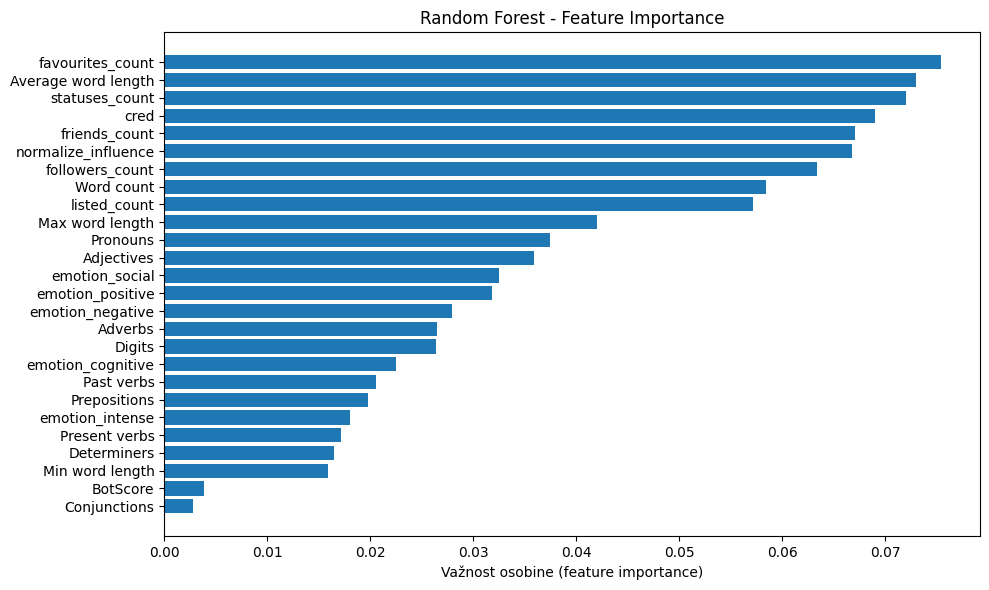

In [155]:

feature_names = x_train.columns

features_sorted = sorted(zip(importances, feature_names), reverse=True)
importances_sorted, names_sorted = zip(*features_sorted)

plt.figure(figsize=(10, 6))
plt.barh(names_sorted, importances_sorted)
plt.xlabel("Važnost osobine (feature importance)")
plt.title("Random Forest - Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [157]:
#Decision Tree - Full

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.6258941877794337
Precision: 0.6520521641731338
Recall: 0.5887877474353417
F1: 0.6188071827189553
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.67      0.63     12998
         1.0       0.65      0.59      0.62     13842

    accuracy                           0.63     26840
   macro avg       0.63      0.63      0.63     26840
weighted avg       0.63      0.63      0.63     26840

------------------------------
Confusion matrix:
[[8649 4349]
 [5692 8150]]


In [ ]:
# Naive Bayes -  Full

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 5.0, 'fit_prior': False}
Accuracy: 0.5884500745156482
Precision: 0.6038170206445863
Recall: 0.5874151134229157
F1: 0.59550314926029
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.57      0.59      0.58     12998
         1.0       0.60      0.59      0.60     13842

    accuracy                           0.59     26840
   macro avg       0.59      0.59      0.59     26840
weighted avg       0.59      0.59      0.59     26840

------------------------------
Confusion matrix:
[[7663 5335]
 [5711 8131]]


In [ ]:
# Logistic Regression - Full

lr = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']    
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy: 0.6130029806259314
Precision: 0.6323247797778628
Recall: 0.5963733564513799
F1: 0.6138231029482842
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.63      0.61     12998
         1.0       0.63      0.60      0.61     13842

    accuracy                           0.61     26840
   macro avg       0.61      0.61      0.61     26840
weighted avg       0.61      0.61      0.61     26840

------------------------------
Confusion matrix:
[[8198 4800]
 [5587 8255]]


In [ ]:
#KNeighbors - Full


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1:", metrics.f1_score(y_test, y_pred_knn))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.6429955290611028
Precision: 0.6644025933930225
Recall: 0.6218754515243462
F1: 0.6424360026867677
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.62      0.67      0.64     12998
         1.0       0.66      0.62      0.64     13842

    accuracy                           0.64     26840
   macro avg       0.64      0.64      0.64     26840
weighted avg       0.64      0.64      0.64     26840

------------------------------
Confusion matrix:
[[8650 4348]
 [5234 8608]]


In [ ]:
#XGBoost - Full

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1:", metrics.f1_score(y_test, y_pred_xgb))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.6809612518628912
Precision: 0.6949841176036049
Recall: 0.6796705678370177
F1: 0.6872420468242083
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.67     12998
         1.0       0.69      0.68      0.69     13842

    accuracy                           0.68     26840
   macro avg       0.68      0.68      0.68     26840
weighted avg       0.68      0.68      0.68     26840

------------------------------
Confusion matrix:
[[8869 4129]
 [4434 9408]]


In [103]:
# SVM - Full

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))
print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))
print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.62548435171386
Precision: 0.6555063187264073
Recall: 0.5770842363820258
F1: 0.6138005225142155
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.68      0.64     12998
         1.0       0.66      0.58      0.61     13842

    accuracy                           0.63     26840
   macro avg       0.63      0.63      0.63     26840
weighted avg       0.63      0.63      0.62     26840

------------------------------
Confusion matrix:
[[8800 4198]
 [5854 7988]]


In [ ]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
feature_names = x_train.columns

features_sorted = sorted(zip(importances, feature_names), reverse=True)
importances_sorted, names_sorted = zip(*features_sorted)

plt.figure(figsize=(10, 6))
plt.barh(names_sorted, importances_sorted)
plt.xlabel("Važnost osobine (feature importance)")
plt.title("Random Forest - Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


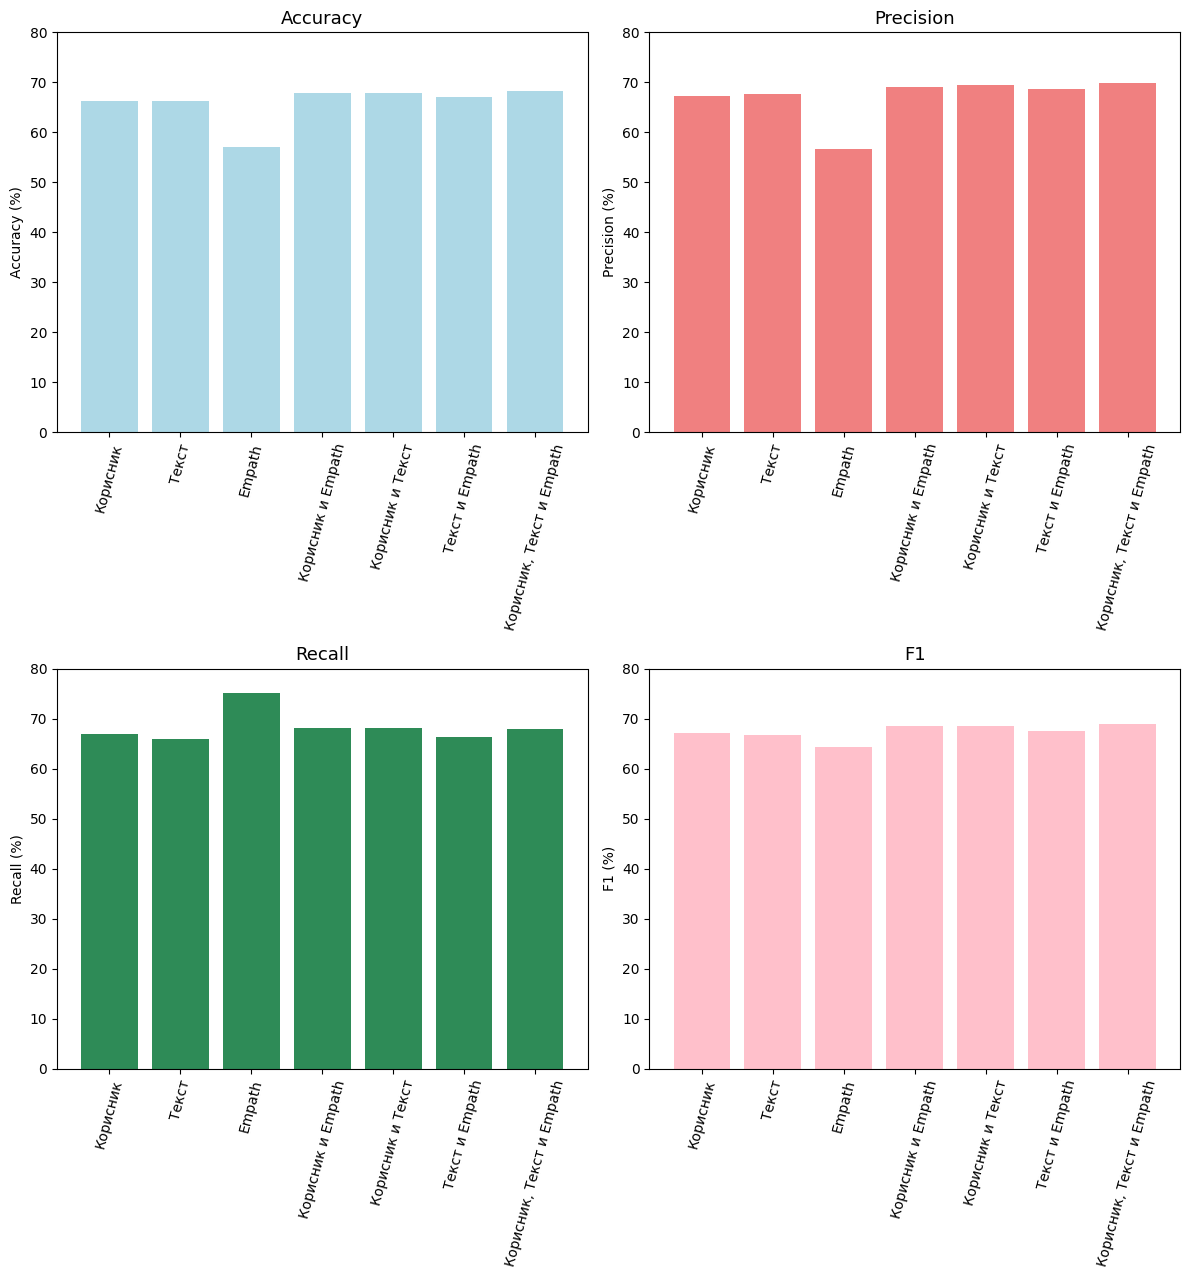

In [148]:
import matplotlib.pyplot as plt

results = {
    "Корисник":     [0.662, 0.673, 0.670, 0.671],
    "Текст": [0.662, 0.677, 0.659, 0.668],
    "Empath":     [0.571, 0.566, 0.751, 0.643],
    "Корисник и Empath":    [0.678, 0.690, 0.681, 0.685],
    "Корисник и Текст":    [0.678, 0.694, 0.681, 0.685],
    "Текст и Empath":     [0.671, 0.687, 0.664, 0.675],
    "Корисник, Текст и Empath":    [0.683, 0.698, 0.680, 0.689]
}

metrics1 = ["Accuracy", "Precision", "Recall", "F1"]
colors = ['lightblue', 'lightcoral', 'seagreen', 'pink']
fig, axes = plt.subplots(2, 2, figsize=(12, 14))

for i, ax in enumerate(axes.flat):
    values = [results[model][i] * 100 for model in results]
    ax.bar(results.keys(), values, color=colors[i])
    ax.set_ylim([0, 80])
    ax.set_ylabel(f"{metrics1[i]} (%)")
    #ax.set_xlabel("Атрибути")
    ax.tick_params(axis='x', labelrotation=75)

    ax.set_title(f"{metrics1[i]}", fontsize=13)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


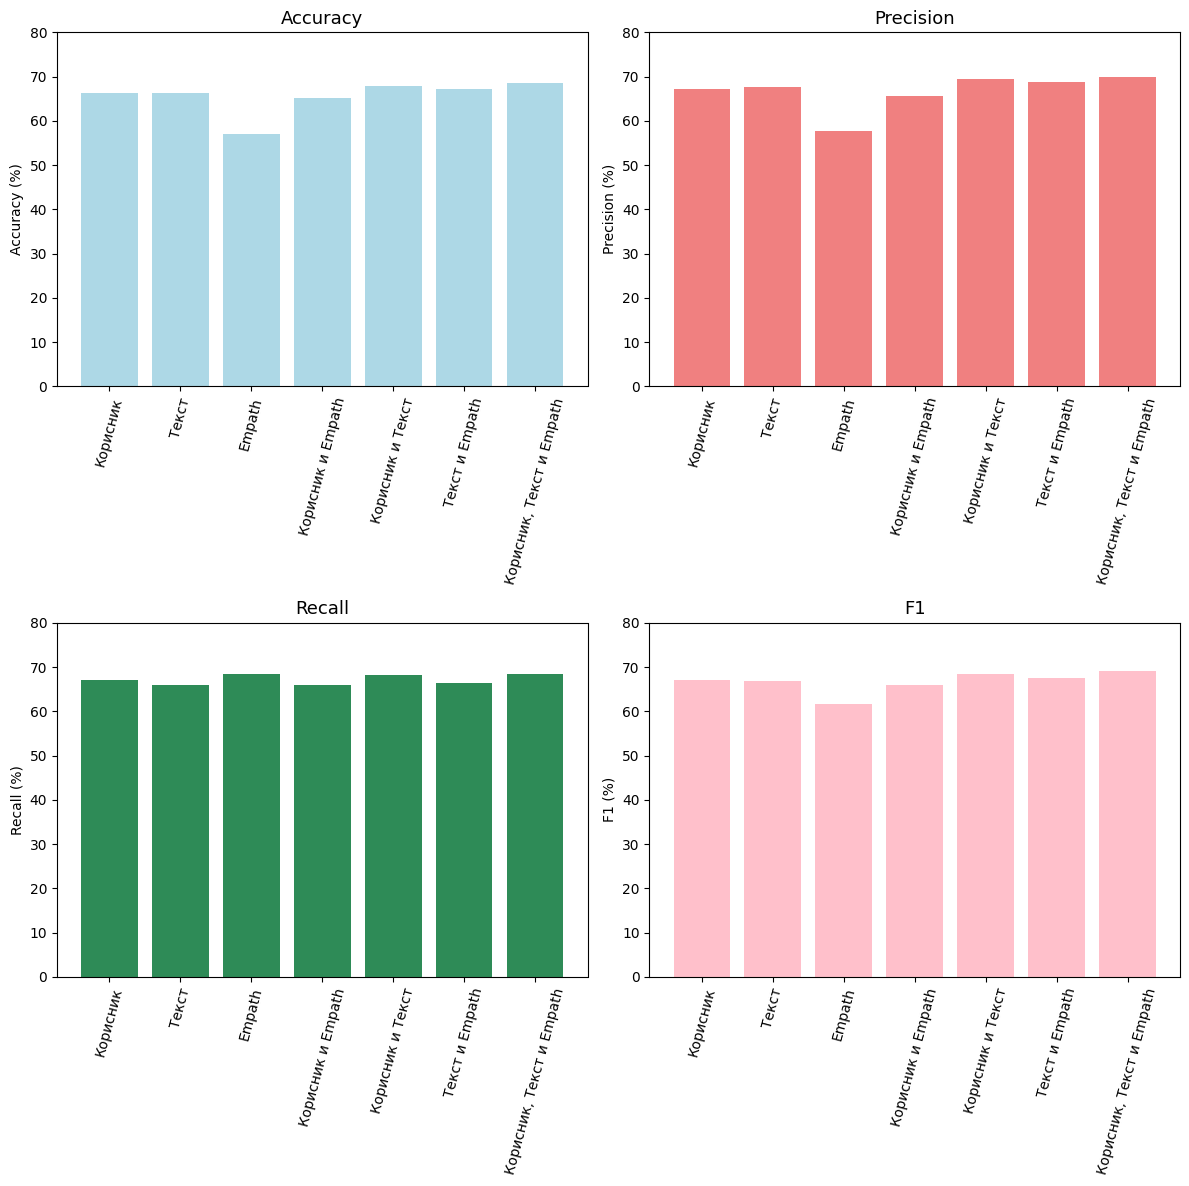

In [149]:
# novi empath

results = {
    "Корисник":     [0.662, 0.673, 0.670, 0.671],
    "Текст": [0.662, 0.677, 0.659, 0.668],
    "Empath":     [0.571, 0.578, 0.684, 0.616],
    "Корисник и Empath":    [0.651, 0.655, 0.660, 0.660],
    "Корисник и Текст":    [0.678, 0.694, 0.681, 0.685],
    "Текст и Empath":     [0.671, 0.687, 0.665, 0.676],
    "Корисник, Текст и Empath":    [0.685, 0.700, 0.685, 0.692]
}

metrics1 = ["Accuracy", "Precision", "Recall", "F1"]
colors = ['lightblue', 'lightcoral', 'seagreen', 'pink']
fig, axes = plt.subplots(2, 2, figsize=(12, 13))

for i, ax in enumerate(axes.flat):
    values = [results[model][i] * 100 for model in results]
    ax.bar(results.keys(), values, color=colors[i])
    ax.set_ylim([0, 80])
    ax.set_ylabel(f"{metrics1[i]} (%)")
    #ax.set_xlabel("Атрибути")
    ax.tick_params(axis='x', labelrotation=75)

    ax.set_title(f"{metrics1[i]}", fontsize=13)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


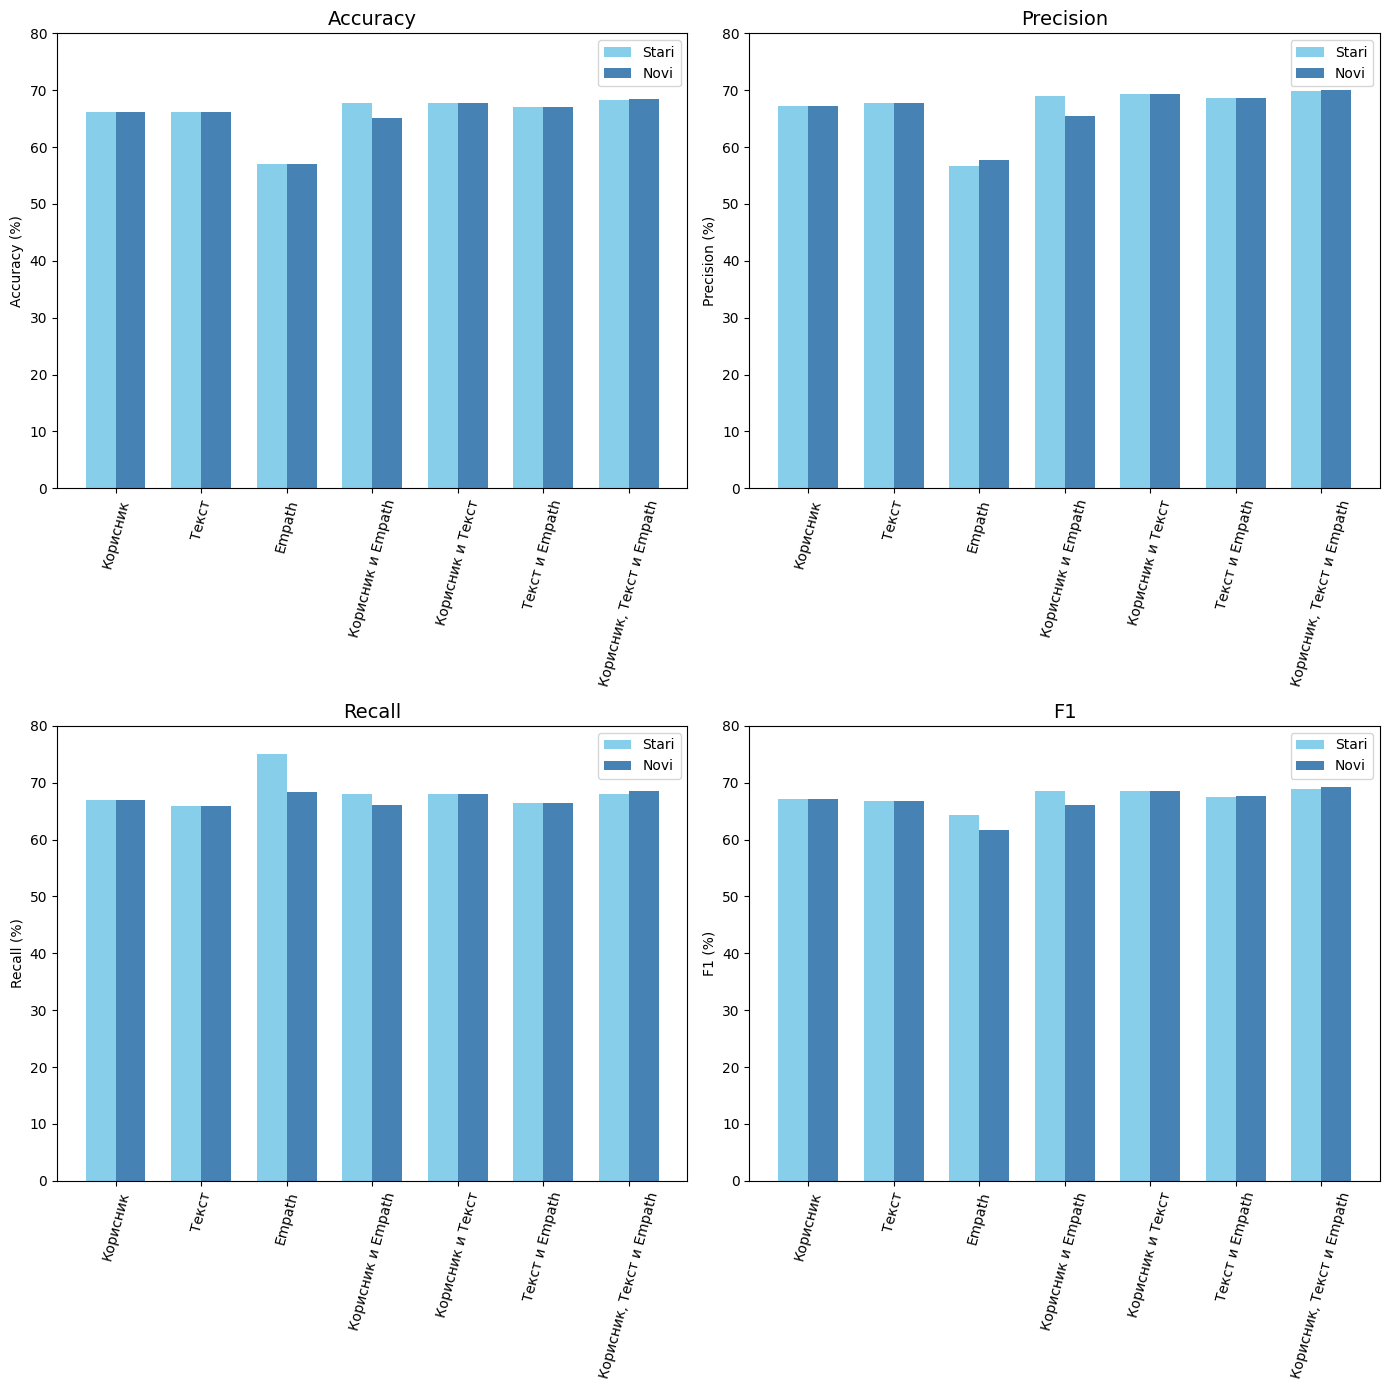

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# Stari rezultati
old_results = {
    "Корисник":     [0.662, 0.673, 0.670, 0.671],
    "Текст": [0.662, 0.677, 0.659, 0.668],
    "Empath":     [0.571, 0.566, 0.751, 0.643],
    "Корисник и Empath":    [0.678, 0.690, 0.681, 0.685],
    "Корисник и Текст":    [0.678, 0.694, 0.681, 0.685],
    "Текст и Empath":     [0.671, 0.687, 0.664, 0.675],
    "Корисник, Текст и Empath":    [0.683, 0.698, 0.680, 0.689]
}

# Novi rezultati
new_results = {
    "Корисник":     [0.662, 0.673, 0.670, 0.671],
    "Текст": [0.662, 0.677, 0.659, 0.668],
    "Empath":     [0.571, 0.578, 0.684, 0.616],
    "Корисник и Empath":    [0.651, 0.655, 0.660, 0.660],
    "Корисник и Текст":    [0.678, 0.694, 0.681, 0.685],
    "Текст и Empath":     [0.671, 0.687, 0.665, 0.676],
    "Корисник, Текст и Empath":    [0.685, 0.700, 0.685, 0.692]
}

metrics1 = ["Accuracy", "Precision", "Recall", "F1"]
colors = ['skyblue', 'steelblue']  # Stari i novi rezultat
labels = list(old_results.keys())
x = np.arange(len(labels))  # Lokacije na x-osi
width = 0.35  # Širina stubića

fig, axes = plt.subplots(2, 2, figsize=(14, 14))

for i, ax in enumerate(axes.flat):
    old_vals = [old_results[label][i] * 100 for label in labels]
    new_vals = [new_results[label][i] * 100 for label in labels]

    # Nacrtaj stare i nove rezultate jedne pored drugih
    ax.bar(x - width/2, old_vals, width, label='Stari', color=colors[0])
    ax.bar(x + width/2, new_vals, width, label='Novi', color=colors[1])

    ax.set_title(metrics[i], fontsize=14)
    ax.set_ylabel(f"{metrics1[i]} (%)")
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=75)
    ax.set_ylim([0, 80])
    ax.legend()

plt.tight_layout()
plt.show()
